🧠 Definition
PCA is a Dimensionality Reduction technique used in Machine Learning and statistics.

✅ It transforms a large set of features (variables) into a smaller set of new features called principal components, while retaining most of the important information in the dataset.

Think of PCA as a way to simplify complex data without losing its essence.

🎯 Why Do We Need PCA?
When we deal with data having too many features (high dimensions):

🚨 Some features may be redundant or irrelevant.
🐢 High-dimensional data increases computation time (curse of dimensionality).
🤯 It's hard to visualize data beyond 3 dimensions.
PCA helps us: ✅ Compress data into fewer dimensions. ✅ Remove noise and redundancy. ✅ Visualize high-dimensional data in 2D or 3D.

📌 How Does PCA Work? (Step by Step)

Let’s simplify:

1️⃣ Standardize the Data
PCA is sensitive to the scale of features.
So we standardize (mean = 0, variance = 1) all features.

2️⃣ Find Covariance Matrix
Calculate how features vary together (covariance).
Shows relationships between variables.

3️⃣ Compute Eigenvectors and Eigenvalues
Eigenvectors → The directions of the new feature space (principal components).
Eigenvalues → The magnitude (importance) of each principal component.

4️⃣ Sort Eigenvectors
Sort eigenvectors by their eigenvalues in descending order.
Higher eigenvalue = more important component.

5️⃣ Select Principal Components
Keep top k components that explain most of the variance.
These become our new features.

6️⃣ Transform the Data
Project the original data onto the selected principal components.

In [1]:
import pandas as pd
import numpy as np
from  sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = {
    'Height': [170, 165, 180, 175, 160, 172, 168, 177, 162, 158],
    'Weight': [65, 59, 75, 68, 55, 70, 62, 74, 58, 54],
    'Age': [30, 25, 35, 28, 22, 32, 27, 33, 24, 21],
    'Gender': [1, 0, 1, 1, 0, 1, 0, 1, 0, 0]  # 1 = Male, 0 = Female
}
df = pd.DataFrame(data)
print(df)

   Height  Weight  Age  Gender
0     170      65   30       1
1     165      59   25       0
2     180      75   35       1
3     175      68   28       1
4     160      55   22       0
5     172      70   32       1
6     168      62   27       0
7     177      74   33       1
8     162      58   24       0
9     158      54   21       0


In [3]:
x = df.drop('Gender',axis = 1)
y = df['Gender']
scaler = StandardScaler()
x_scaled = scaler.fit_transform(df)

In [4]:
pca = PCA(n_components=2)
x_pca = pca.fit_transform(x_scaled)

x_train,x_test,y_train,y_test = train_test_split(x_pca,y,test_size=0.2,random_state=42)
model = LogisticRegression()
model.fit(x_train,y_train)
y_pred = model.predict(x_test)

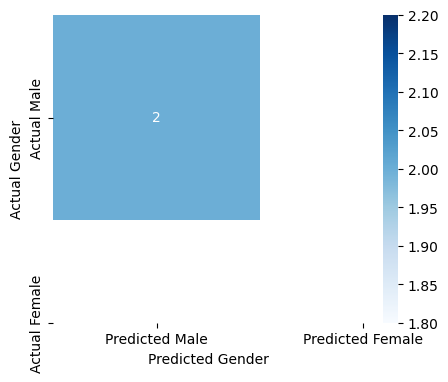

In [5]:
cm = confusion_matrix(y_test,y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm,annot = True,fmt = 'd',cmap = 'Blues',xticklabels=['Predicted Male','Predicted Female'],yticklabels=['Actual Male','Actual Female'])
plt.xlabel('Predicted Gender')
plt.ylabel('Actual Gender')
plt.show()

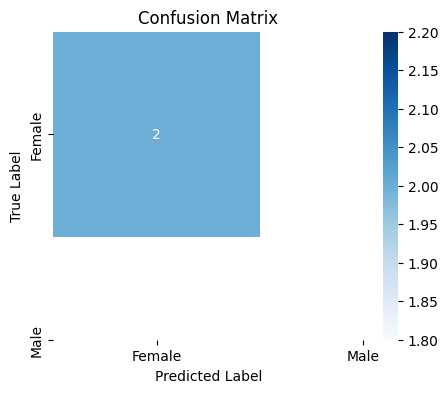

In [6]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Female', 'Male'], yticklabels=['Female', 'Male'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

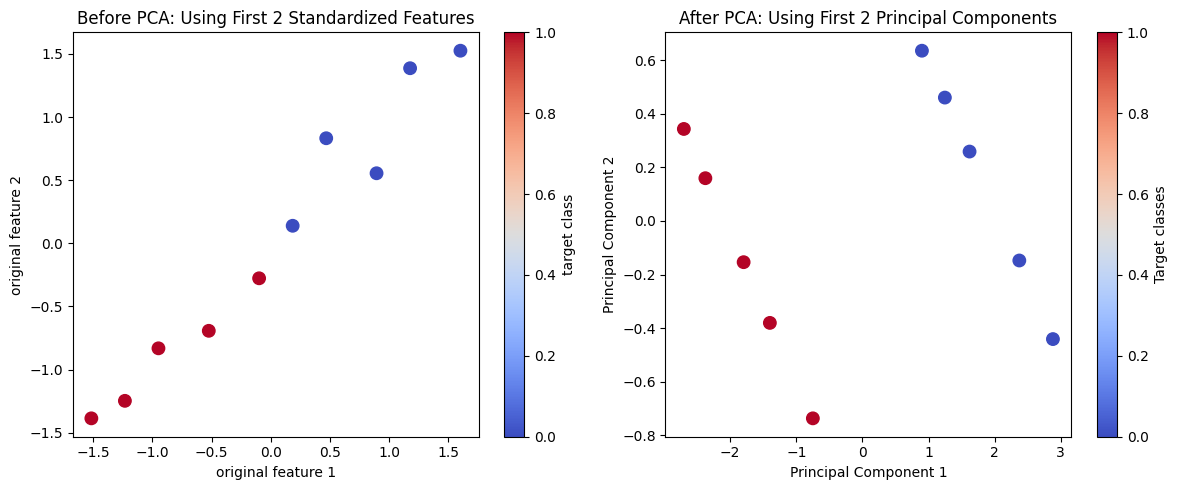

In [8]:
y_numeric = pd.factorize(y)[0]
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.scatter(x_scaled[:,0],x_scaled[:,1],cmap='coolwarm',c=y_numeric,s=80)
plt.title('Before PCA: Using First 2 Standardized Features')
plt.xlabel('original feature 1')
plt.ylabel('original feature 2')
plt.colorbar(label='target class')


plt.subplot(1,2,2)
plt.scatter(x_pca[:,0],x_pca[:,1],cmap = 'coolwarm',s=80,c=y_numeric)
plt.title('After PCA: Using First 2 Principal Components')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Target classes')

plt.tight_layout()
plt.show()

